In [2]:
import pandas as pd
titanic = pd.read_csv('train.csv')
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
# Age样本少，要进行填充
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# 打印Sex的种类
print (titanic['Sex'].unique())

['male' 'female']


In [5]:
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1
print (titanic['Sex'].unique())

[0 1]


In [6]:
print (titanic['Embarked'].unique())

['S' 'C' 'Q' nan]


In [7]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

In [8]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [18]:
# import the linear regression class
from sklearn.linear_model import LinearRegression
# import cross validation
from sklearn.model_selection import KFold

# The columus we'll use to predict the target
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset. It return the row indices corresponding to train
# We set random_state to ensure we get the same split every time we run this
kf = KFold(n_splits=3, random_state=1)

predictions = []
for train, test in kf.split(titanic):
    # The predictors we're using to train the algorithm. Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    train_target = titanic['Survived'].iloc[train]
    # Training the algorithm using the predictors and target
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
    

In [19]:
print(predictions)

[array([ 0.09277887,  0.96268076,  0.59418598,  0.93147996,  0.0542683 ,
        0.16669896,  0.36895288,  0.10781588,  0.52152644,  0.87905196,
        0.65197938,  0.82770141,  0.1376113 , -0.1637553 ,  0.66083526,
        0.63827393,  0.16006955,  0.28782981,  0.53654427,  0.61480103,
        0.26299049,  0.26393325,  0.73817417,  0.50760735,  0.56443493,
        0.33179707,  0.12484479,  0.46979815,  0.6564497 ,  0.08366634,
        0.47958876,  1.03550243,  0.65640385,  0.08524764,  0.53215027,
        0.40223995,  0.12484628,  0.1320551 ,  0.57533875,  0.67001779,
        0.48351312,  0.76218581,  0.12508284,  0.87601236,  0.71589614,
        0.08372106,  0.1357618 ,  0.65640385,  0.06310204,  0.6087039 ,
        0.05320397,  0.13196638,  0.9034952 ,  0.75284781,  0.31872044,
        0.49816671,  0.82523289,  0.13150882,  0.81857575, -0.03401834,
        0.16762412,  0.95779377,  0.3967412 ,  0.06500459,  0.53682253,
        0.06013413,  0.78078329,  0.14320593,  0.44220537,  0.0

In [22]:
print(len(predictions[0]))

297


In [24]:
import numpy as np

# The predictions are in three separate numpy arrays. Concatenate them into one.
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0.)
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
accuracy = sum(predictions == titanic['Survived'])/len(predictions)
print(accuracy)

0.7856341189674523


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
alg = LogisticRegression(random_state=1)
scores = cross_val_score(alg,titanic[predictors], titanic['Survived'], cv=3)
print(scores.mean())

0.7901234567901234


c:\users\zoe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\zoe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\zoe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

kf = KFold( n_splits=3, random_state=1)
scores = cross_val_score(alg,titanic[predictors], titanic['Survived'], cv=kf)
print(scores.mean())

0.7946127946127947


In [40]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = KFold( n_splits=3, random_state=1)
scores = cross_val_score(alg,titanic[predictors], titanic['Survived'], cv=kf)
print(scores.mean())

0.8327721661054994


In [63]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = KFold( n_splits=3, random_state=1)
scores = cross_val_score(alg,titanic[predictors], titanic['Survived'], cv=kf)
print(scores.mean())

0.8327721661054994


In [64]:
# Generating a famiysize column
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# The .apply method generate a new series
titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x))


In [69]:
import re

# A function to get a title from name
def get_title(name):
    # Use a regular expression to search for a title. Titles always consist of capital and lowercase letters
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs
titles = titanic['Name'].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer. Some titles are very rare, and are compressed into the same codes as other 
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6, 'Major': 7, 'Mlle': 8, 'Col':7, 'Mme': 8, 'Don': 9, 'Lady':10, 'Countess': 10, 'Jonkheer': 10, 'Sir': 9, 'Capt':7, 'Ms':2 }
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything
print(pd.value_counts(titles))

# Add in the title column
titanic['Title'] = titles



Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Countess      1
Ms            1
Capt          1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


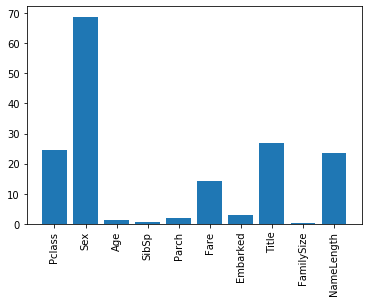

0.819304152637486


In [75]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'NameLength']

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic['Survived'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores. See how 'Pclass', 'Sex', 'Title', and 'Fare' are best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features
predictors = ['Pclass', 'Sex', 'Fare','Title']

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
kf = KFold( n_splits=3, random_state=1)
scores = cross_val_score(alg,titanic[predictors], titanic['Survived'], cv=kf)
print(scores.mean())

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithm we want to ensemble
# We are using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3),['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked'] ],
    [LogisticRegression(random_state=1),['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked'] ]
]

kf = KFold( n_splits=3, random_state=1)

predictions = []
for train, test in kf.split(titanic):
    train_target = titanic['Survived'].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembing schame -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0]*4 + full_test_predictions[1])/5
    # Any value over .5 is assumed to be a 1 prediction, and blow .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
    
# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)
accuracy = sum(predictions == titanic['Survived'])/len(predictions)
print(accuracy)



0.8215488215488216


c:\users\zoe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\zoe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\zoe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
